In [ ]:
! pip install mlcroissant

In [ ]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

  -  [Metadata(Credit Card Fraud Detection)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="creditcard.csv")]


,creditcard.csv/Time,creditcard.csv/V1,creditcard.csv/V2,creditcard.csv/V3,creditcard.csv/V4,creditcard.csv/V5,creditcard.csv/V6,creditcard.csv/V7,creditcard.csv/V8,creditcard.csv/V9,...,creditcard.csv/V21,creditcard.csv/V22,creditcard.csv/V23,creditcard.csv/V24,creditcard.csv/V25,creditcard.csv/V26,creditcard.csv/V27,creditcard.csv/V28,creditcard.csv/Amount,creditcard.csv/Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Preparing the data
record_set_df.columns = record_set_df.columns.str.replace("creditcard.csv/", "", regex=False)
print(record_set_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# 1) EDA

import pandas as pd

print(f"Dataset shape: {record_set_df.shape}")
print(record_set_df.head())

# Checking for data types and N/a's
print(record_set_df.info())
missing_values = record_set_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-5-15dac31c2926>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")


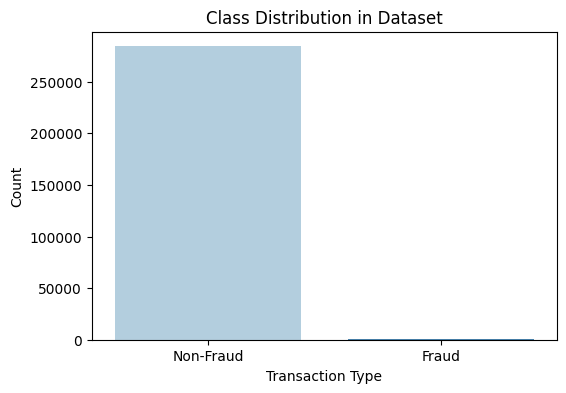

In [ ]:
# 2) Checking the class imbalance level

import matplotlib.pyplot as plt
import seaborn as sns

class_counts = record_set_df['Class'].value_counts()
print(class_counts)

# Making a plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()


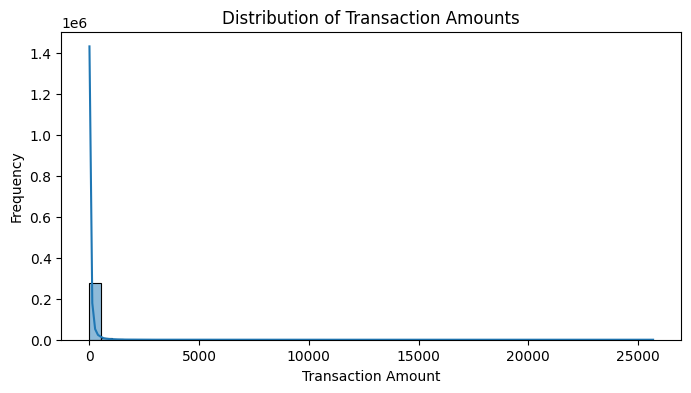

In [ ]:
# 3) Checking the variables distribution

# Transaction amounts plot
plt.figure(figsize=(8,4))
sns.histplot(record_set_df['Amount'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()


In [ ]:
# Transaction amounts statistics
amount_stats = record_set_df['Amount'].describe()
print(amount_stats)

# Checking the fraud and non-fraud trasactions separetely
fraud_amount_stats = record_set_df[record_set_df['Class'] == 1]['Amount'].describe()
non_fraud_amount_stats = record_set_df[record_set_df['Class'] == 0]['Amount'].describe()

print("Fraud Transactions Amount Stats:\n", fraud_amount_stats)
print("Non-Fraud Transactions Amount Stats:\n", non_fraud_amount_stats)

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Fraud Transactions Amount Stats:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Non-Fraud Transactions Amount Stats:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


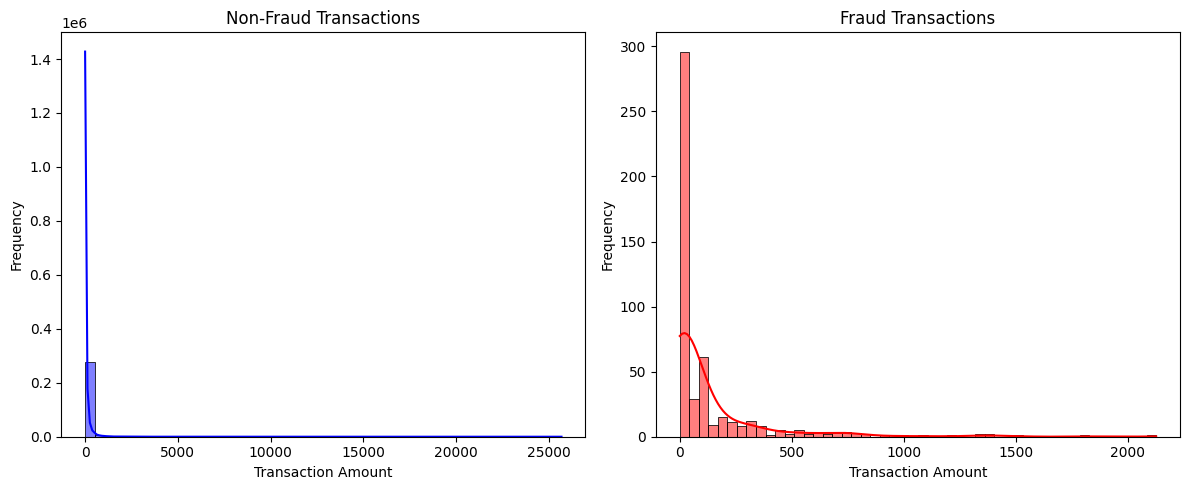

In [ ]:
# Visualising the fraud and non-fraud trasactions separetely
plt.figure(figsize=(12,5))

# non-fraud trasactions
plt.subplot(1,2,1)
sns.histplot(record_set_df[record_set_df["Class"] == 0]["Amount"], bins=50, kde=True, color="blue")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Non-Fraud Transactions")

# fraud trasactions
plt.subplot(1,2,2)
sns.histplot(record_set_df[record_set_df["Class"] == 1]["Amount"], bins=50, kde=True, color="red")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Fraud Transactions")

plt.tight_layout()
plt.show()


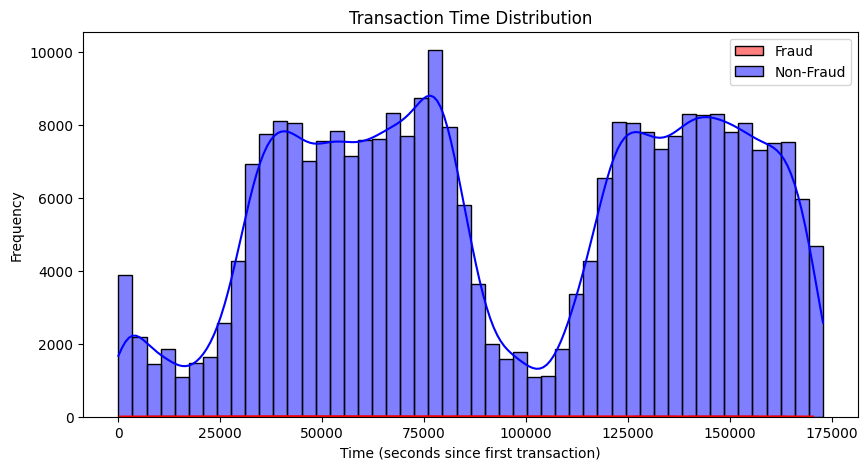

In [ ]:
# 4) Time patterns analysis

if 'Time' in record_set_df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(record_set_df[record_set_df['Class'] == 1]['Time'], bins=50, color='red', label='Fraud', kde=True)
    sns.histplot(record_set_df[record_set_df['Class'] == 0]['Time'], bins=50, color='blue', label='Non-Fraud', kde=True)
    plt.xlabel("Time (seconds since first transaction)")
    plt.ylabel("Frequency")
    plt.title("Transaction Time Distribution")
    plt.legend()
    plt.show()

In [ ]:
# Main time variable stats
time_stats = record_set_df['Time'].describe()
print("Overall Time Stats:\n", time_stats)

# Time variable stats for non-fraud trasactions
fraud_time_stats = record_set_df[record_set_df["Class"] == 1]["Time"].describe()
print("\nFraud Transactions Time Stats:\n", fraud_time_stats)

# Time variable stats for fraud trasactions
non_fraud_time_stats = record_set_df[record_set_df["Class"] == 0]["Time"].describe()
print("\nNon-Fraud Transactions Time Stats:\n", non_fraud_time_stats)


Overall Time Stats:
 count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Fraud Transactions Time Stats:
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Non-Fraud Transactions Time Stats:
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


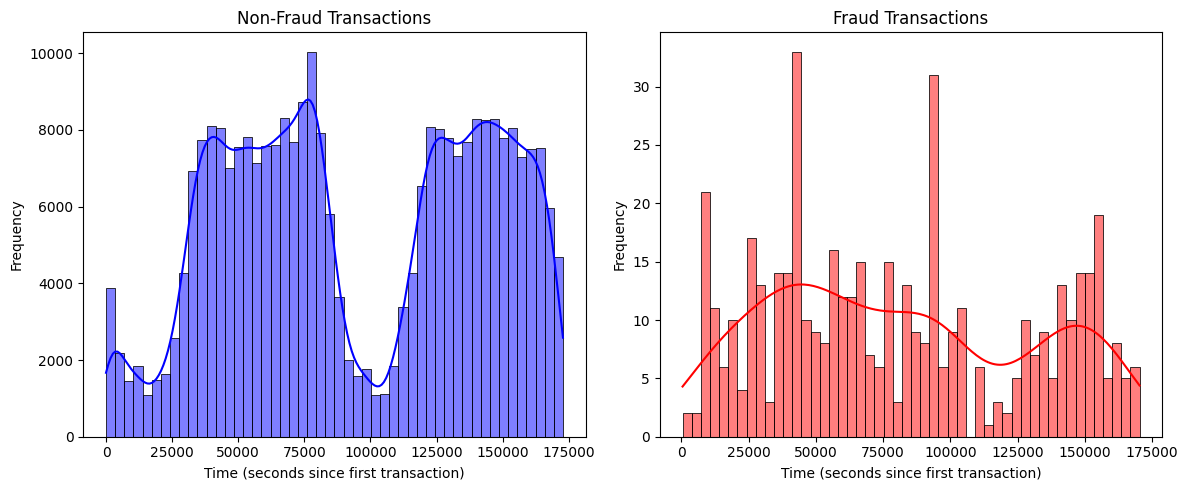

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(record_set_df[record_set_df["Class"] == 0]["Time"], bins=50, kde=True, color="blue")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.title("Non-Fraud Transactions")

plt.subplot(1,2,2)
sns.histplot(record_set_df[record_set_df["Class"] == 1]["Time"], bins=50, kde=True, color="red")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.title("Fraud Transactions")

plt.tight_layout()
plt.show()


In [ ]:
# Normalization of Amount and Time using StandardScaler

from sklearn.preprocessing import StandardScaler

df_processed = record_set_df.copy()
scaler = StandardScaler()
df_processed[['Amount', 'Time']] = scaler.fit_transform(df_processed[['Amount', 'Time']])
print(df_processed[['Amount', 'Time']].describe())


             Amount          Time
count  2.848070e+05  2.848070e+05
mean   2.913952e-17 -3.065637e-16
std    1.000002e+00  1.000002e+00
min   -3.532294e-01 -1.996583e+00
25%   -3.308401e-01 -8.552120e-01
50%   -2.652715e-01 -2.131453e-01
75%   -4.471707e-02  9.372174e-01
max    1.023622e+02  1.642058e+00


In [ ]:
# Train/test split(80/20)

from sklearn.model_selection import train_test_split


X = df_processed.drop(columns=['Class'])
y = df_processed['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Class distribution after undersampling:\n", y_train_under.value_counts())

Class distribution after undersampling:
 Class
0    394
1    394
Name: count, dtype: int64


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

print("Balanced Random Forest trained successfully.")
print("Class distribution after BRF:\n", y_train.value_counts())

Balanced Random Forest trained successfully.
Class distribution after BRF:
 Class
0    227451
1       394
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
class_weights = {0: len(y_train) / (2 * y_train.value_counts()[0]),
                 1: len(y_train) / (2 * y_train.value_counts()[1])}

print("Computed class weights:", class_weights)
print("Class distribution after class weighting:\n", y_train.value_counts())

Computed class weights: {0: np.float64(0.5008661206149896), 1: np.float64(289.14340101522845)}
Class distribution after class weighting:
 Class
0    227451
1       394
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN

# Apply K-SMOTEENN to the existing training set
smote_enn = SMOTEENN(random_state=42)
X_train_kse, y_train_kse = smote_enn.fit_resample(X_train, y_train)

print("Class distribution after K-SMOTEENN:\n", y_train_kse.value_counts())

Class distribution after K-SMOTEENN:
 Class
1    227451
0    227054
Name: count, dtype: int64


In [ ]:
# Model training and evaluation

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from imblearn.metrics import geometric_mean_score

In [ ]:
# Models

base_models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

In [ ]:
# Datasets obtained from 5 methods

datasets = {
    'Original': (X_train, y_train),
    'Random Undersampling': (X_train_under, y_train_under),
    'SMOTE': (X_train_smote, y_train_smote),
    'Class Weighting': (X_train, y_train),
    'Balanced RF': (X_train, y_train),
    'K-SMOTEENN': (X_train_kse, y_train_kse)
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from tqdm.notebook import tqdm

results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Outer loop: balancing methods
for method_name, (X_bal, y_bal) in tqdm(datasets.items(), desc="Balancing Methods"):
    print(f"\n--- Method: {method_name} ---")

    # Compute weights if class weighting
    if method_name == 'Class Weighting':
        class_weights = {
            0: len(y_bal) / (2 * y_bal.value_counts()[0]),
            1: len(y_bal) / (2 * y_bal.value_counts()[1])
        }
        scale_pos_weight = y_bal.value_counts()[0] / y_bal.value_counts()[1]

    # Loop through models
    for model_name, base_model in tqdm(base_models.items(), desc=f"{method_name} Models", leave=False):
        print(f"\nModel: {model_name}")

        model = clone(base_model)

        # Apply class weights if needed
        if method_name == 'Class Weighting':
            if model_name in ['Logistic Regression', 'Random Forest']:
                model.set_params(class_weight=class_weights)
            elif model_name == 'XGBoost':
                model.set_params(scale_pos_weight=scale_pos_weight)

        # Cross-validation
        fold_idx = 1
        for train_idx, val_idx in cv.split(X_bal, y_bal):
            X_tr, X_val = X_bal.iloc[train_idx], X_bal.iloc[val_idx]
            y_tr, y_val = y_bal.iloc[train_idx], y_bal.iloc[val_idx]

            model.fit(X_tr, y_tr)

            y_pred = model.predict(X_val)
            y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_pred

            precision = precision_score(y_val, y_pred, zero_division=0)
            recall = recall_score(y_val, y_pred, zero_division=0)
            f1 = f1_score(y_val, y_pred, zero_division=0)
            pr_auc = average_precision_score(y_val, y_proba)
            gmean = geometric_mean_score(y_val, y_pred)

            results.append({
                'Method': method_name,
                'Model': model_name,
                'Fold': fold_idx,
                'Precision': precision,
                'Recall': recall,
                'F1': f1,
                'PR-AUC': pr_auc,
                'G-Mean': gmean
            })

            print(f"Fold {fold_idx} - Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}, PR-AUC: {pr_auc:.3f}, G-Mean: {gmean:.3f}")
            fold_idx += 1

Balancing Methods:   0%|          | 0/6 [00:00<?, ?it/s]


--- Method: Original ---


Original Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.906, Recall: 0.615, F1: 0.733, PR-AUC: 0.819, G-Mean: 0.784
Fold 2 - Precision: 0.923, Recall: 0.608, F1: 0.733, PR-AUC: 0.756, G-Mean: 0.779
Fold 3 - Precision: 0.831, Recall: 0.684, F1: 0.750, PR-AUC: 0.704, G-Mean: 0.827
Fold 4 - Precision: 0.847, Recall: 0.633, F1: 0.725, PR-AUC: 0.800, G-Mean: 0.795
Fold 5 - Precision: 0.877, Recall: 0.633, F1: 0.735, PR-AUC: 0.737, G-Mean: 0.795

Model: Random Forest
Fold 1 - Precision: 0.952, Recall: 0.756, F1: 0.843, PR-AUC: 0.862, G-Mean: 0.870
Fold 2 - Precision: 1.000, Recall: 0.759, F1: 0.863, PR-AUC: 0.807, G-Mean: 0.871
Fold 3 - Precision: 0.938, Recall: 0.759, F1: 0.839, PR-AUC: 0.825, G-Mean: 0.871
Fold 4 - Precision: 0.890, Recall: 0.823, F1: 0.855, PR-AUC: 0.890, G-Mean: 0.907
Fold 5 - Precision: 0.953, Recall: 0.772, F1: 0.853, PR-AUC: 0.818, G-Mean: 0.879

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.953, Recall: 0.782, F1: 0.859, PR-AUC: 0.878, G-Mean: 0.884


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 1.000, Recall: 0.759, F1: 0.863, PR-AUC: 0.838, G-Mean: 0.871


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.924, Recall: 0.772, F1: 0.841, PR-AUC: 0.847, G-Mean: 0.879


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.882, Recall: 0.848, F1: 0.865, PR-AUC: 0.860, G-Mean: 0.921


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Precision: 0.969, Recall: 0.797, F1: 0.875, PR-AUC: 0.845, G-Mean: 0.893

--- Method: Random Undersampling ---


Random Undersampling Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.934, Recall: 0.899, F1: 0.916, PR-AUC: 0.977, G-Mean: 0.918
Fold 2 - Precision: 0.972, Recall: 0.886, F1: 0.927, PR-AUC: 0.980, G-Mean: 0.929
Fold 3 - Precision: 0.962, Recall: 0.962, F1: 0.962, PR-AUC: 0.990, G-Mean: 0.962
Fold 4 - Precision: 1.000, Recall: 0.936, F1: 0.967, PR-AUC: 0.989, G-Mean: 0.967
Fold 5 - Precision: 0.973, Recall: 0.899, F1: 0.934, PR-AUC: 0.984, G-Mean: 0.936

Model: Random Forest
Fold 1 - Precision: 0.959, Recall: 0.886, F1: 0.921, PR-AUC: 0.982, G-Mean: 0.923
Fold 2 - Precision: 0.986, Recall: 0.873, F1: 0.926, PR-AUC: 0.983, G-Mean: 0.929
Fold 3 - Precision: 0.987, Recall: 0.949, F1: 0.968, PR-AUC: 0.992, G-Mean: 0.968
Fold 4 - Precision: 1.000, Recall: 0.923, F1: 0.960, PR-AUC: 0.995, G-Mean: 0.961
Fold 5 - Precision: 0.972, Recall: 0.886, F1: 0.927, PR-AUC: 0.969, G-Mean: 0.929

Model: XGBoost
Fold 1 - Precision: 0.938, Recall: 0.949, F1: 0.943, PR-AUC: 0.985, G-Mean: 0.943


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 1.000, Recall: 0.899, F1: 0.947, PR-AUC: 0.981, G-Mean: 0.948
Fold 3 - Precision: 0.950, Recall: 0.962, F1: 0.956, PR-AUC: 0.989, G-Mean: 0.956


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 1.000, Recall: 0.936, F1: 0.967, PR-AUC: 0.995, G-Mean: 0.967
Fold 5 - Precision: 0.986, Recall: 0.899, F1: 0.940, PR-AUC: 0.983, G-Mean: 0.942

--- Method: SMOTE ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SMOTE Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.973, Recall: 0.931, F1: 0.952, PR-AUC: 0.993, G-Mean: 0.952
Fold 2 - Precision: 0.973, Recall: 0.930, F1: 0.951, PR-AUC: 0.992, G-Mean: 0.952
Fold 3 - Precision: 0.973, Recall: 0.931, F1: 0.951, PR-AUC: 0.992, G-Mean: 0.952
Fold 4 - Precision: 0.972, Recall: 0.931, F1: 0.951, PR-AUC: 0.992, G-Mean: 0.952
Fold 5 - Precision: 0.974, Recall: 0.930, F1: 0.951, PR-AUC: 0.992, G-Mean: 0.952

Model: Random Forest
Fold 1 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 2 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 3 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 4 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 5 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.999, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.999, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.999, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000

--- Method: Class Weighting ---


Class Weighting Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.061, Recall: 0.936, F1: 0.114, PR-AUC: 0.796, G-Mean: 0.955
Fold 2 - Precision: 0.066, Recall: 0.911, F1: 0.124, PR-AUC: 0.740, G-Mean: 0.944
Fold 3 - Precision: 0.067, Recall: 0.873, F1: 0.125, PR-AUC: 0.668, G-Mean: 0.925
Fold 4 - Precision: 0.057, Recall: 0.937, F1: 0.108, PR-AUC: 0.810, G-Mean: 0.955
Fold 5 - Precision: 0.063, Recall: 0.911, F1: 0.118, PR-AUC: 0.712, G-Mean: 0.943

Model: Random Forest
Fold 1 - Precision: 0.934, Recall: 0.731, F1: 0.820, PR-AUC: 0.843, G-Mean: 0.855
Fold 2 - Precision: 0.982, Recall: 0.684, F1: 0.806, PR-AUC: 0.811, G-Mean: 0.827
Fold 3 - Precision: 0.951, Recall: 0.734, F1: 0.829, PR-AUC: 0.827, G-Mean: 0.857
Fold 4 - Precision: 0.925, Recall: 0.785, F1: 0.849, PR-AUC: 0.877, G-Mean: 0.886
Fold 5 - Precision: 0.952, Recall: 0.747, F1: 0.837, PR-AUC: 0.834, G-Mean: 0.864

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.903, Recall: 0.833, F1: 0.867, PR-AUC: 0.861, G-Mean: 0.913


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 0.968, Recall: 0.772, F1: 0.859, PR-AUC: 0.824, G-Mean: 0.879


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.926, Recall: 0.797, F1: 0.857, PR-AUC: 0.841, G-Mean: 0.893


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.821, Recall: 0.873, F1: 0.847, PR-AUC: 0.883, G-Mean: 0.934


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Precision: 0.928, Recall: 0.810, F1: 0.865, PR-AUC: 0.866, G-Mean: 0.900

--- Method: Balanced RF ---


Balanced RF Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.906, Recall: 0.615, F1: 0.733, PR-AUC: 0.819, G-Mean: 0.784
Fold 2 - Precision: 0.923, Recall: 0.608, F1: 0.733, PR-AUC: 0.756, G-Mean: 0.779
Fold 3 - Precision: 0.831, Recall: 0.684, F1: 0.750, PR-AUC: 0.704, G-Mean: 0.827
Fold 4 - Precision: 0.847, Recall: 0.633, F1: 0.725, PR-AUC: 0.800, G-Mean: 0.795
Fold 5 - Precision: 0.877, Recall: 0.633, F1: 0.735, PR-AUC: 0.737, G-Mean: 0.795

Model: Random Forest
Fold 1 - Precision: 0.952, Recall: 0.756, F1: 0.843, PR-AUC: 0.862, G-Mean: 0.870
Fold 2 - Precision: 1.000, Recall: 0.759, F1: 0.863, PR-AUC: 0.807, G-Mean: 0.871
Fold 3 - Precision: 0.938, Recall: 0.759, F1: 0.839, PR-AUC: 0.825, G-Mean: 0.871
Fold 4 - Precision: 0.890, Recall: 0.823, F1: 0.855, PR-AUC: 0.890, G-Mean: 0.907
Fold 5 - Precision: 0.953, Recall: 0.772, F1: 0.853, PR-AUC: 0.818, G-Mean: 0.879

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 0.953, Recall: 0.782, F1: 0.859, PR-AUC: 0.878, G-Mean: 0.884


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 1.000, Recall: 0.759, F1: 0.863, PR-AUC: 0.838, G-Mean: 0.871


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 0.924, Recall: 0.772, F1: 0.841, PR-AUC: 0.847, G-Mean: 0.879


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 0.882, Recall: 0.848, F1: 0.865, PR-AUC: 0.860, G-Mean: 0.921


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Precision: 0.969, Recall: 0.797, F1: 0.875, PR-AUC: 0.845, G-Mean: 0.893

--- Method: K-SMOTEENN ---


K-SMOTEENN Models:   0%|          | 0/3 [00:00<?, ?it/s]


Model: Logistic Regression
Fold 1 - Precision: 0.972, Recall: 0.935, F1: 0.953, PR-AUC: 0.993, G-Mean: 0.954
Fold 2 - Precision: 0.974, Recall: 0.933, F1: 0.953, PR-AUC: 0.993, G-Mean: 0.954
Fold 3 - Precision: 0.974, Recall: 0.932, F1: 0.952, PR-AUC: 0.993, G-Mean: 0.953
Fold 4 - Precision: 0.973, Recall: 0.932, F1: 0.952, PR-AUC: 0.992, G-Mean: 0.953
Fold 5 - Precision: 0.972, Recall: 0.935, F1: 0.953, PR-AUC: 0.993, G-Mean: 0.954

Model: Random Forest
Fold 1 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 2 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 3 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 4 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000
Fold 5 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - Precision: 1.000, Recall: 1.000, F1: 1.000, PR-AUC: 1.000, G-Mean: 1.000


In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv("model_evaluation_results.csv", index=False)

In [ ]:
import pandas as pd
results_df = pd.read_csv("model_evaluation_results.csv")
print(results_df.head())

     Method                Model  Fold  Precision    Recall        F1  \
0  Original  Logistic Regression     1   0.905660  0.615385  0.732824   
1  Original  Logistic Regression     2   0.923077  0.607595  0.732824   
2  Original  Logistic Regression     3   0.830769  0.683544  0.750000   
3  Original  Logistic Regression     4   0.847458  0.632911  0.724638   
4  Original  Logistic Regression     5   0.877193  0.632911  0.735294   

     PR-AUC    G-Mean  
0  0.819168  0.784421  
1  0.755665  0.779449  
2  0.704361  0.826667  
3  0.799642  0.795479  
4  0.737066  0.795496  


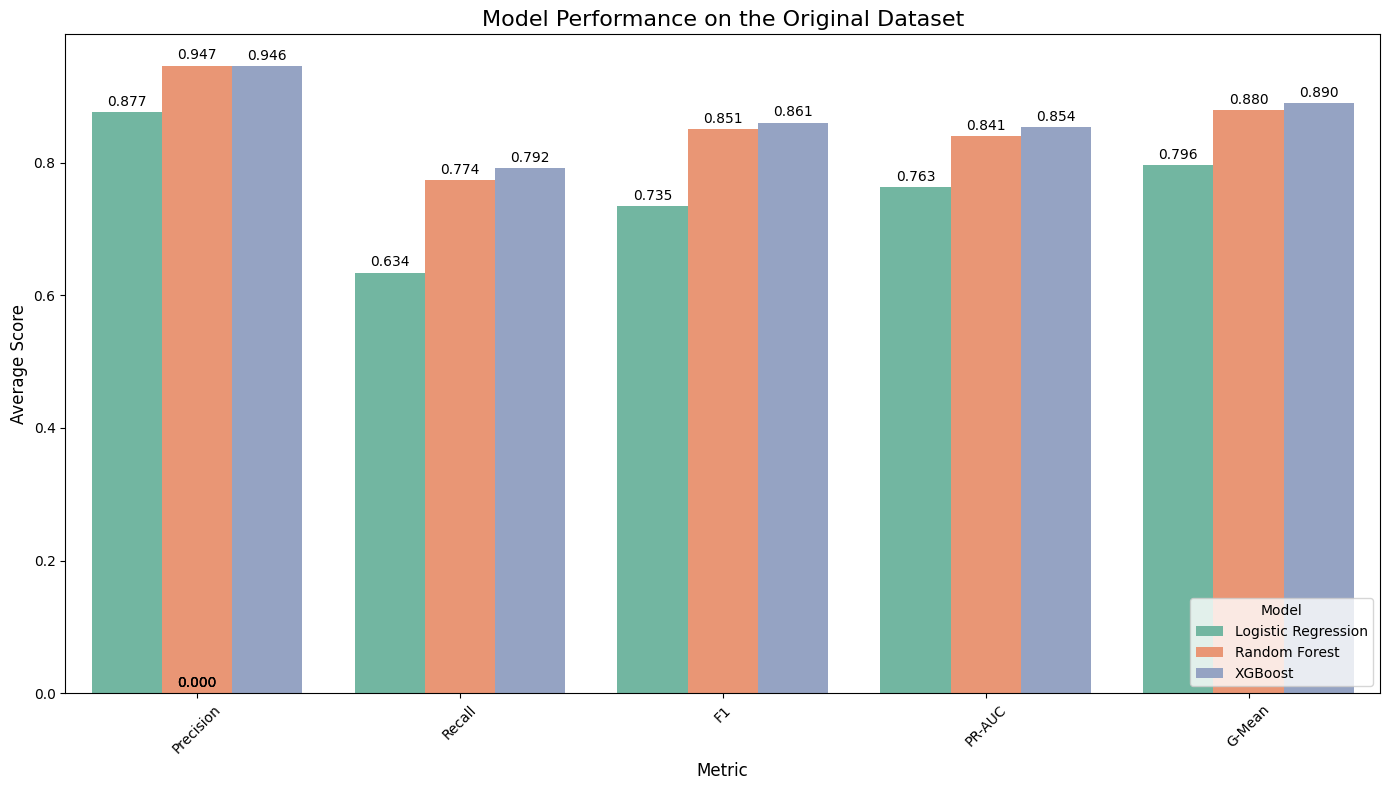

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data
original_results = results_df[results_df['Method'] == 'Original']

# Calculating averages by metrics
average_scores_original = original_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted = average_scores_original.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")
plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('Model Performance on the Original Dataset', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


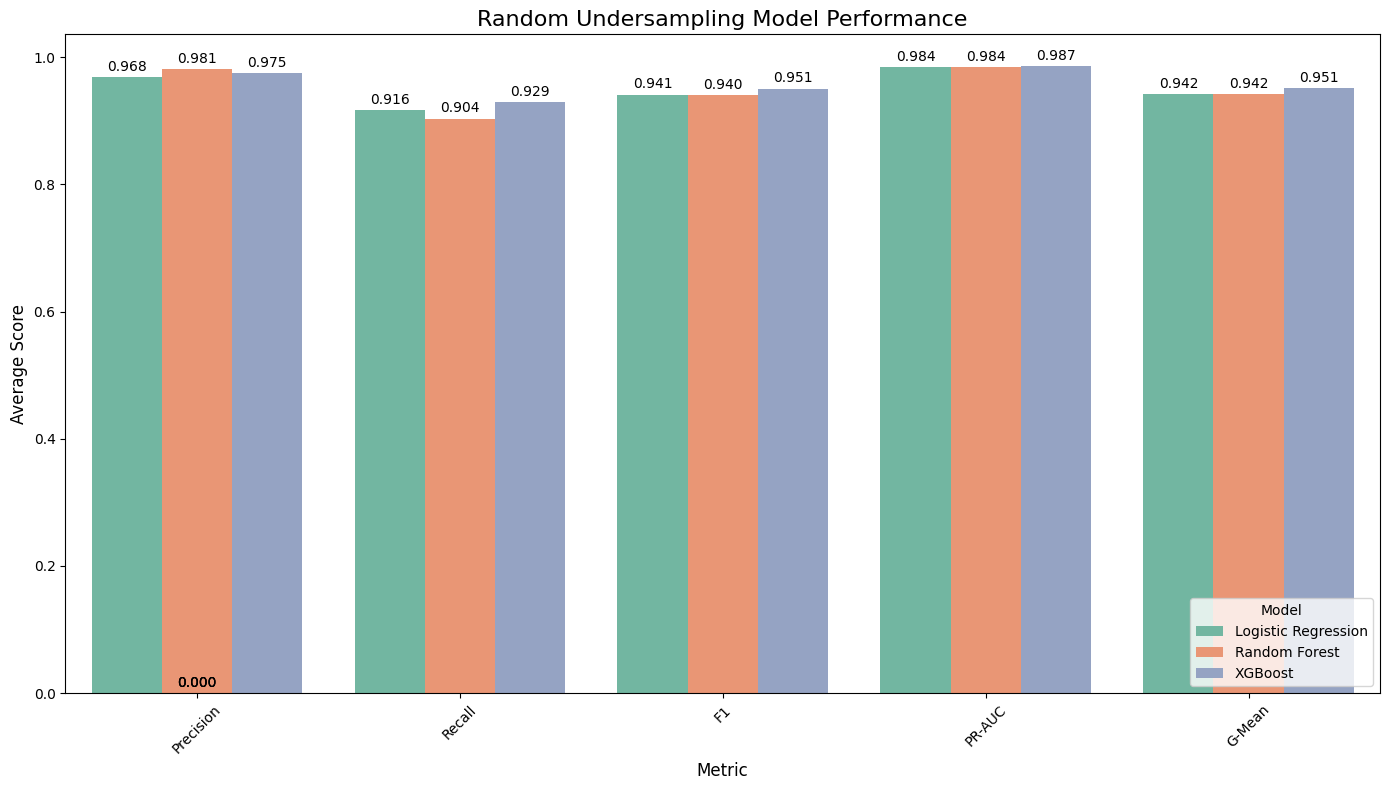

In [ ]:
random_undersampling_results = results_df[results_df['Method'] == 'Random Undersampling']

average_scores_undersampling = random_undersampling_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted_undersampling = average_scores_undersampling.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")

plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted_undersampling, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('Random Undersampling Model Performance', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

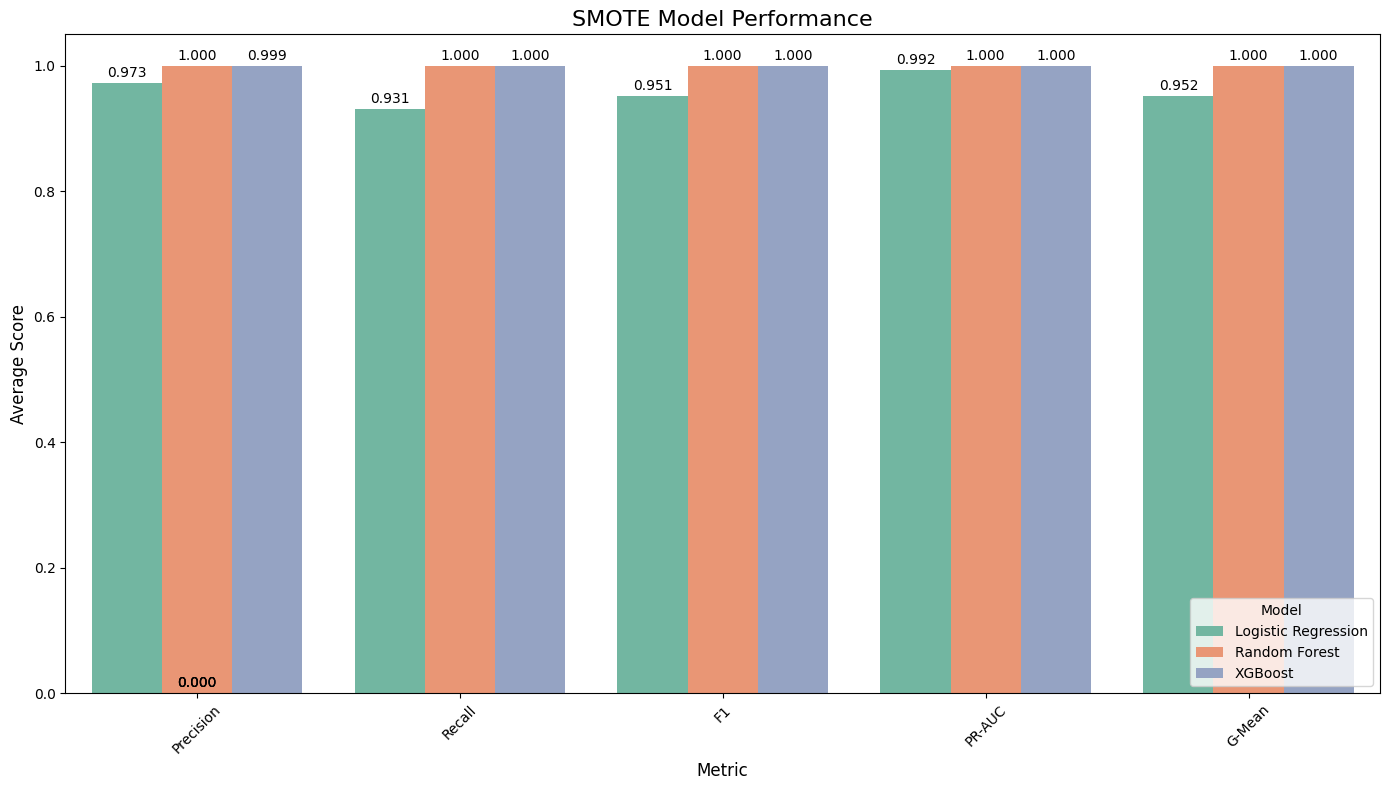

In [ ]:
smote_results = results_df[results_df['Method'] == 'SMOTE']

average_scores_smote = smote_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted_smote = average_scores_smote.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")

plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted_smote, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('SMOTE Model Performance', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

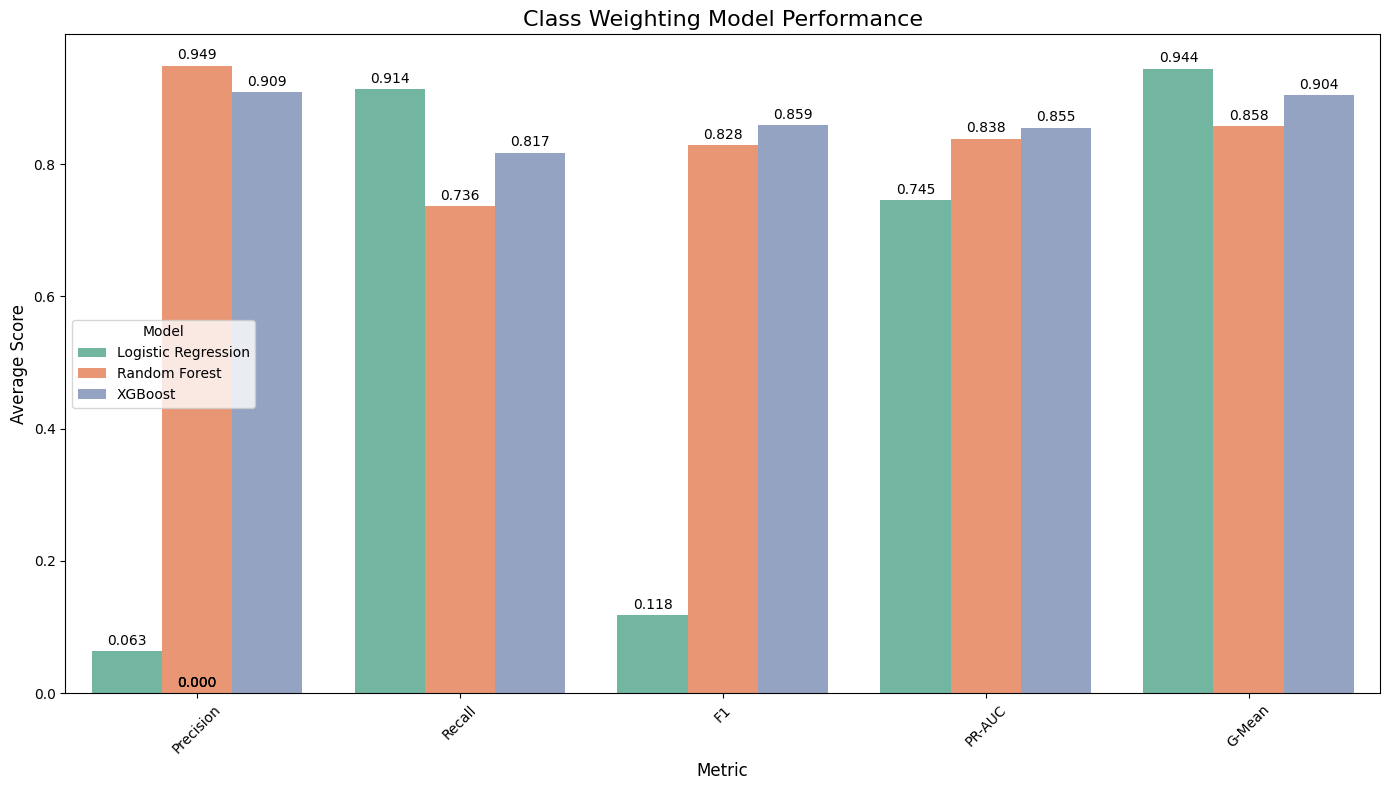

In [ ]:
class_weighting_results = results_df[results_df['Method'] == 'Class Weighting']

average_scores_class_weighting = class_weighting_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted_class_weighting = average_scores_class_weighting.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")

plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted_class_weighting, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('Class Weighting Model Performance', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


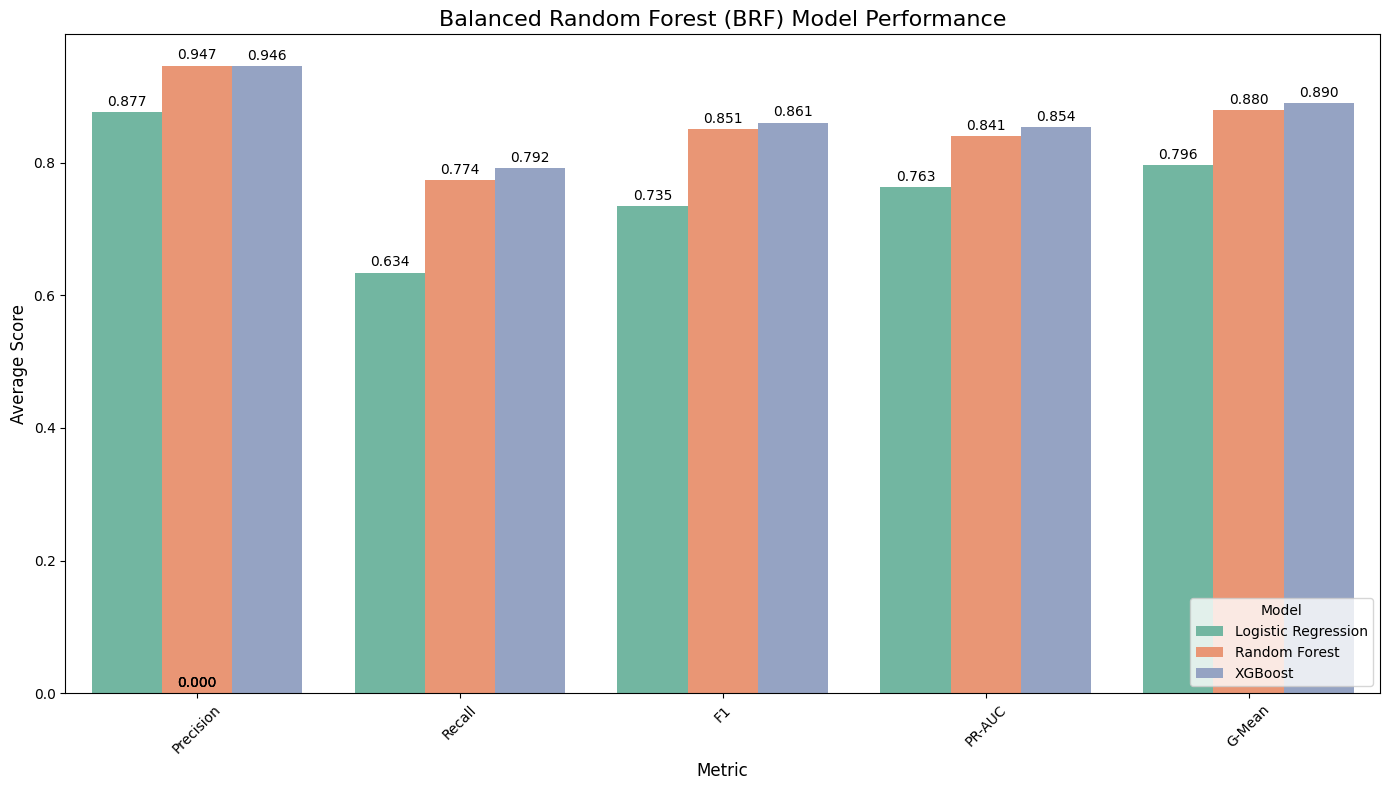

In [ ]:
brf_results = results_df[results_df['Method'] == 'Balanced RF']

average_scores_brf = brf_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted_brf = average_scores_brf.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")
plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted_brf, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('Balanced Random Forest (BRF) Model Performance', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


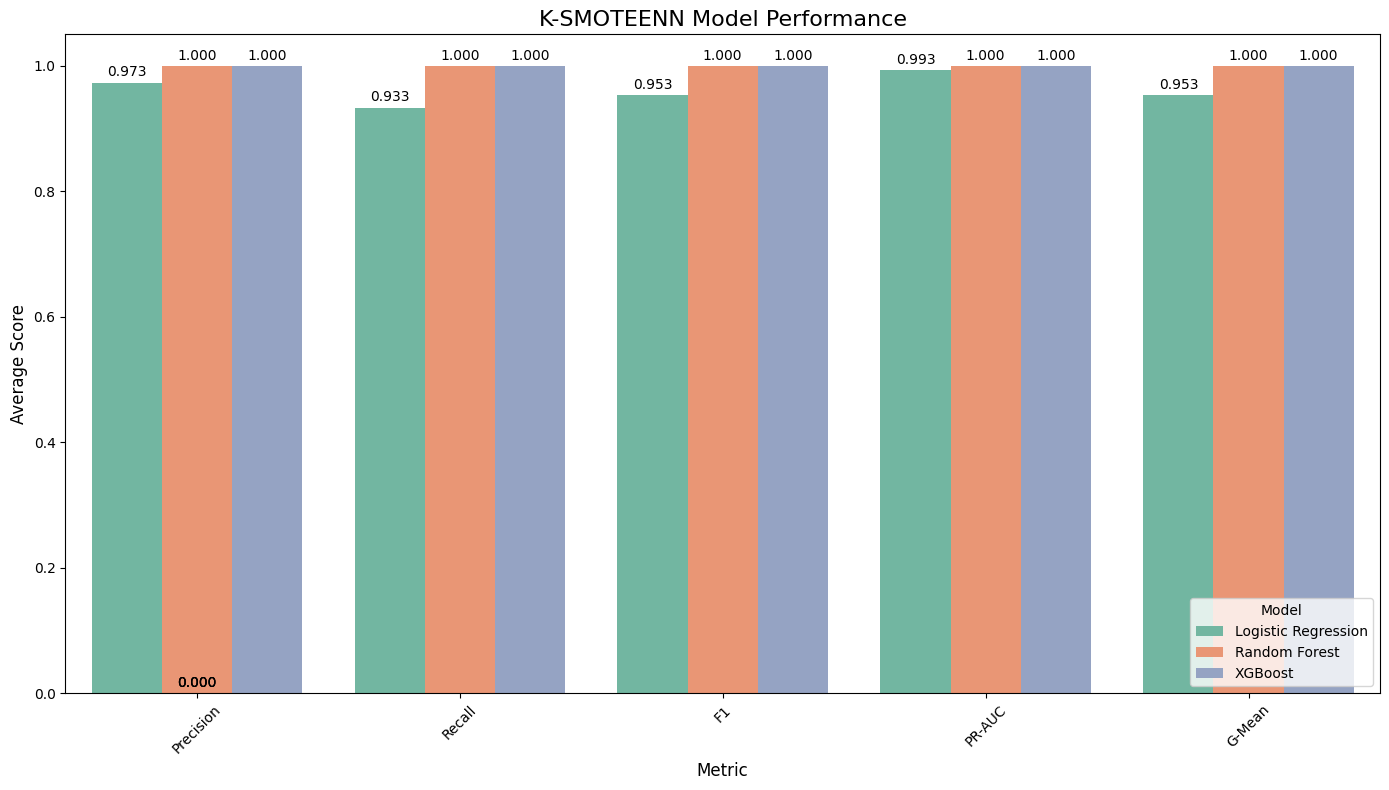

In [ ]:
ksmoteenn_results = results_df[results_df['Method'] == 'K-SMOTEENN']

average_scores_ksmoteenn = ksmoteenn_results.groupby(['Model']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'PR-AUC': 'mean',
    'G-Mean': 'mean'
}).reset_index()

df_melted_ksmoteenn = average_scores_ksmoteenn.melt(id_vars=["Model"], value_vars=["Precision", "Recall", "F1", "PR-AUC", "G-Mean"], var_name="Metric", value_name="Average Score")

plt.figure(figsize=(14, 8))

sns.barplot(data=df_melted_ksmoteenn, x='Metric', y='Average Score', hue='Model', palette='Set2', dodge=True)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2
    y_position = p.get_y() + height / 2
    plt.text(x_position, height + 0.005, f'{height:.3f}', ha='center', fontsize=10, va='bottom')

plt.title('K-SMOTEENN Model Performance', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Grouping data by 'Method' to apply ANOVA on F1 score
f1_data = [results_df[results_df['Method'] == method]['F1'] for method in results_df['Method'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*f1_data)

# Display the ANOVA result
anova_result

F_onewayResult(statistic=np.float64(14.541264381559158), pvalue=np.float64(2.975276060102797e-10))

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test
tukey_result = pairwise_tukeyhsd(endog=results_df['F1'], groups=results_df['Method'], alpha=0.05)

# Display the Tukey HSD result
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
         Balanced RF      Class Weighting  -0.2139 0.0024 -0.3732 -0.0546   True
         Balanced RF           K-SMOTEENN   0.1687 0.0316  0.0093   0.328   True
         Balanced RF             Original      0.0    1.0 -0.1593  0.1593  False
         Balanced RF Random Undersampling   0.1286 0.1846 -0.0307  0.2879  False
         Balanced RF                SMOTE   0.1681 0.0324  0.0088  0.3275   True
     Class Weighting           K-SMOTEENN   0.3826    0.0  0.2233  0.5419   True
     Class Weighting             Original   0.2139 0.0024  0.0546  0.3732   True
     Class Weighting Random Undersampling   0.3425    0.0  0.1832  0.5018   True
     Class Weighting                SMOTE   0.3821    0.0  0.2227  0.5414   True
          K-SMOTEENN        

<ipython-input-6-f157d43a7559>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x='Method', y='F1', palette='Set2')


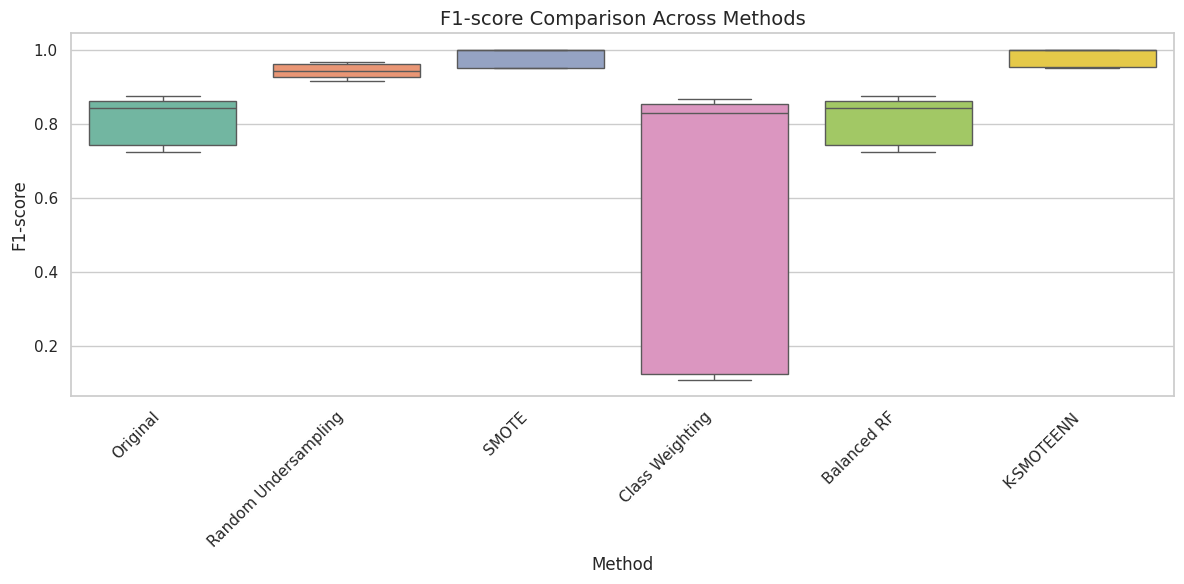

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot style for better visualization
sns.set(style="whitegrid")

# Plotting F1-score comparison across all methods
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Method', y='F1', palette='Set2')
plt.title('F1-score Comparison Across Methods', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Grouping data by 'Method' to apply ANOVA on PR-AUC score
pr_auc_data = [results_df[results_df['Method'] == method]['PR-AUC'] for method in results_df['Method'].unique()]

# Perform ANOVA
anova_pr_auc_result = stats.f_oneway(*pr_auc_data)

# Display the ANOVA result
anova_pr_auc_result

F_onewayResult(statistic=np.float64(89.91921669032601), pvalue=np.float64(3.150404768949355e-32))

In [ ]:
# Perform Tukey HSD test for PR-AUC
tukey_pr_auc_result = pairwise_tukeyhsd(endog=results_df['PR-AUC'], groups=results_df['Method'], alpha=0.05)

# Display the Tukey HSD result
print(tukey_pr_auc_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
         Balanced RF      Class Weighting  -0.0062 0.9981 -0.0482  0.0359  False
         Balanced RF           K-SMOTEENN   0.1785    0.0  0.1365  0.2206   True
         Balanced RF             Original      0.0    1.0 -0.0421  0.0421  False
         Balanced RF Random Undersampling   0.1659    0.0  0.1238  0.2079   True
         Balanced RF                SMOTE   0.1784    0.0  0.1363  0.2204   True
     Class Weighting           K-SMOTEENN   0.1847    0.0  0.1426  0.2268   True
     Class Weighting             Original   0.0062 0.9981 -0.0359  0.0482  False
     Class Weighting Random Undersampling    0.172    0.0    0.13  0.2141   True
     Class Weighting                SMOTE   0.1845    0.0  0.1425  0.2266   True
          K-SMOTEENN        

<ipython-input-9-29e725ad81a1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x='Method', y='PR-AUC', palette='Set2')


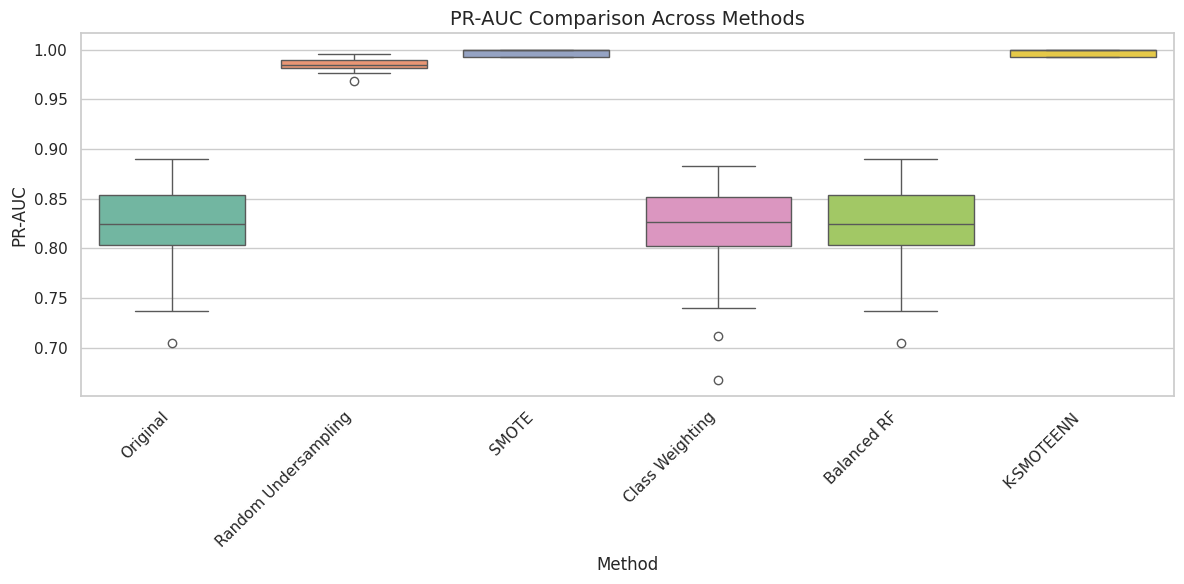

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot style for better visualization
sns.set(style="whitegrid")

# Plotting PR-AUC comparison across all methods
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Method', y='PR-AUC', palette='Set2')
plt.title('PR-AUC Comparison Across Methods', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('PR-AUC', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Grouping data by 'Method' to apply ANOVA on G-Mean score
gmean_data = [results_df[results_df['Method'] == method]['G-Mean'] for method in results_df['Method'].unique()]

# Perform ANOVA
anova_gmean_result = stats.f_oneway(*gmean_data)

# Display the ANOVA result for G-Mean
anova_gmean_result

F_onewayResult(statistic=np.float64(43.3470912143796), pvalue=np.float64(7.223969435491209e-22))

In [ ]:
# Perform Tukey HSD test for G-Mean
tukey_gmean_result = pairwise_tukeyhsd(endog=results_df['G-Mean'], groups=results_df['Method'], alpha=0.05)

# Display the Tukey HSD result for G-Mean
print(tukey_gmean_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
         Balanced RF      Class Weighting   0.0468 0.0055  0.0096  0.0839   True
         Balanced RF           K-SMOTEENN   0.1292    0.0  0.0921  0.1664   True
         Balanced RF             Original      0.0    1.0 -0.0372  0.0372  False
         Balanced RF Random Undersampling     0.09    0.0  0.0528  0.1272   True
         Balanced RF                SMOTE   0.1287    0.0  0.0916  0.1659   True
     Class Weighting           K-SMOTEENN   0.0824    0.0  0.0453  0.1196   True
     Class Weighting             Original  -0.0468 0.0055 -0.0839 -0.0096   True
     Class Weighting Random Undersampling   0.0432  0.013  0.0061  0.0804   True
     Class Weighting                SMOTE    0.082    0.0  0.0448  0.1191   True
          K-SMOTEENN        

<ipython-input-12-bc9ed5eea970>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_df, x='Method', y='G-Mean', palette='Set2')


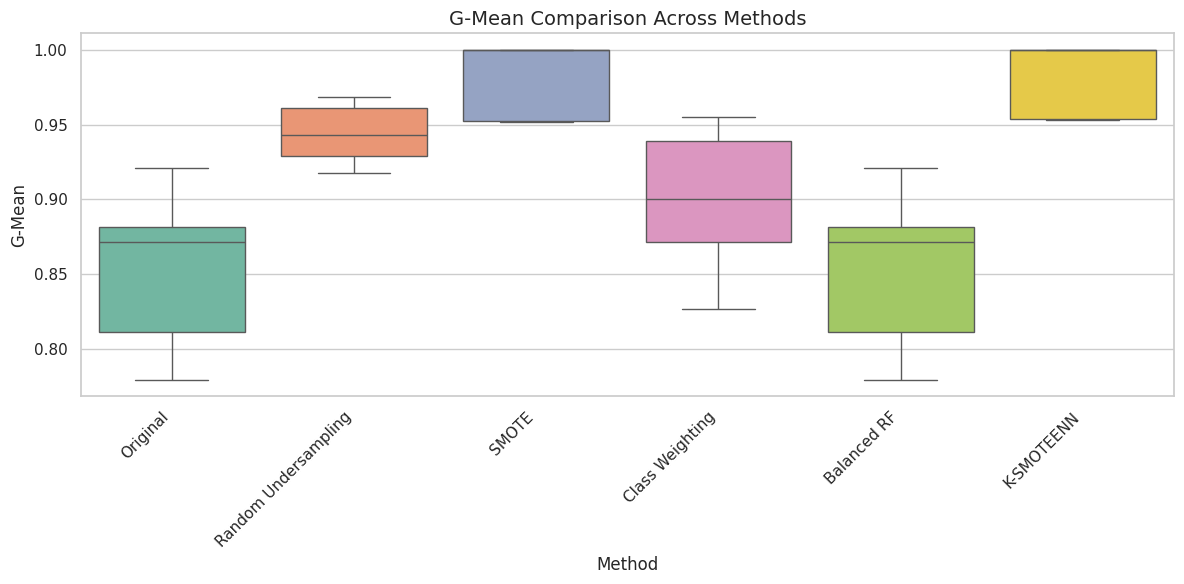

In [ ]:
# Set up the plot style for better visualization
sns.set(style="whitegrid")

# Plotting G-Mean comparison across all methods
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='Method', y='G-Mean', palette='Set2')
plt.title('G-Mean Comparison Across Methods', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('G-Mean', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()